## 엔트로피entropy
* 물리 열역학의 관점에서의 정의
    + 물질의 열적 상태를 나타내는 물리량의 하나
    + 보통 무질서도라고 함
    + 엔트로피가 높으면 무질서도 증가
* 통계적 관점에서의 정의
    + 정보이득information gain의 혼잡도
    + 엔트로피가 높으면 **정보이해가 어려워 짐**    
* 학습데이터는 기본적으로 **혼잡한 상태**임
     + 따라서, 어떤 조건으로 분류해야만 전체 혼잡도가 개선되는지 계산
     + 정리한 결과에 대해 다시 계산해서 처리를 반복 적용함
     + 즉, 정보의 불확실성을 수치로 나타낸 것을 의미 

## 엔트로피의 식
* $ entropy = -\sum p_k \log_2 p_k $
* 복수의 현상(1~n)이 존재할때 그 혼잡도를 나타내는 엔트로피의 식
     + -p(현상1) * log(p(현상1)) + -p(현상2) * log(p(현상2)) + ... ... -p(현상n) * log(p(현상n))
* 참고) 엔트로피는 일반적으로 2를 밑으로 하는 로그로 계산함
    + 단, 자연로그로도 엔트로피를 계산하기도 함     

In [ ]:
# x를 기준으로 y를 나누는 가장 좋은 방법은?
# x = [1,2,3,4,5,6,7,8]
# y = [0,0,0,1,1,1,1,1]

# 방법1) x : 3.5 (최적의 조건)
# 방법2) x : 4.5 (오분류의 가능성 존재)

In [2]:
# ex) 확률 0.1의 현상이 10개 일어난 경우 엔트로피는?
# -p(현상1) * log(p(현상1))
import math

# -0.1 * math.log2(0.1)       # 0.332
-0.1 * math.log2(0.1) * 10    # 3.321

3.3219280948873626

In [3]:
# ex) 확률 0.25의 현상이 4개 일어난 경우 엔트로피는?
-0.25 * math.log2(0.25) * 4

2.0

In [ ]:
# ex) 10마리의 동물이 개인지 고양이인지 분류
# big   follow   walking      class
# yes     yes    yes          dog
# yes     yes    no           cat
# no      yes    yes          dog
# yes     yes    yes          dog
# no      no     yes          cat

# yes     no     yes          dog
# yes     no     yes          cat
# no      no     no           cat
# yes     yes    yes          dog
# no      yes    no           dog

In [4]:
# 1) target에 대한 entropy 계산
# 10마리중 6마리가 개, 4마리가 고양이
# 개로 분류될 확률 :     6/10 = 0.6
# 고양이로 분류될 확률 : 4/10 = 0.4
-0.6 * math.log2(0.6) + -0.4 * math.log2(0.4)

0.9709505944546686

In [5]:
# 2) 덩치big기준으로 분류시 entropy 계산
# 덩치가 큰 것으로 분류 = 개 : 고양이 => 4 : 2
# 덩치가 큰 경우 개로 분류     = 4 : 6 => 0.667
# 덩치가 큰 경우 고양이로 분류 = 2 : 6 => 0.333
-0.667*math.log2(0.667) + -0.333*math.log2(0.333)

0.9179621399872384

In [8]:
# 2b) 덩치big기준으로 분류시 entropy 계산
# 덩치가 작은 것으로 분류 = 개 : 고양이 => 2:2 
# 덩치가 작은 경우 개로 분류     = 2/4 = 0.5 
# 덩치가 작은 경우 고양이로 분류 = 2/4 = 0.5 
-0.5*math.log2(0.5) + -0.5*math.log2(0.5)

1.0

In [9]:
# 덩치로 분류했을때의 엔트로피는 
# 개로 분류될 확률 x 덩치로 분류될 확률과   
# 고양이로 분류될 확률 x 덩치로 분류될 확률을 
# 더해준 결과값이 됨
0.6 * 0.917 + 0.4 * 1.0

0.9502

In [6]:
# 3) 따름follow기준으로 분류시 entropy 계산
# 잘따름으로 분류 = 5:1
# 잘따르는데 개로 분류     = 5/6 = 0.833
# 잘따르는데 고양이로 분류 = 1/6 = 0.167
-0.833*math.log2(0.833) + -0.167*math.log2(0.167)

0.6507958209094192

In [10]:
# 3b) 따름follow기준으로 분류시 entropy 계산
# 잘 안따름으로 분류 = 1:3
# 잘 안따르는데 개로 분류     = 1/4 = 0.25
# 잘 안따르는데 고양이로 분류 = 3/4 = 0.75
-0.25*math.log2(0.25) + -0.75*math.log2(0.75)

0.8112781244591328

In [11]:
# 따름으로 분류했을때의 엔트로피는 
0.6 * 0.650 + 0.4 * 0.811

0.7144

In [7]:
# 4) 산책walking기준으로 분류시 entropy 계산
# 산책으로 분류 = 5:2
# 산책하는데 개로 분류     = 5/7 = 0.714
# 산책하는데 고양이로 분류 = 2/7 = 0.286
-0.714*math.log2(0.714) + -0.286*math.log2(0.286)

0.8634979738266906

In [12]:
# 4b) 산책walking기준으로 분류시 entropy 계산
# 산책 안함으로 분류 = 1:2
# 산책 안하는데 개로 분류     = 1/3 = 0.333
# 산책 안하는데 고양이로 분류 = 2/3 = 0.667
-0.333*math.log2(0.333) + -0.667*math.log2(0.667)

0.9179621399872384

In [13]:
# 산책으로 분류했을때의 엔트로피는 
0.6 * 0.863 + 0.4 * 0.917

0.8845999999999999

In [ ]:
# 따라서, 덩치, 따름, 산책여부에 따라 
# 정보의 불확실수치들을 비교
# 0.970
# 0.9502
# 0.7144 (!!)
# 0.884

## 개/고양이 분류를 의사결정나무로 분석

In [14]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report

In [16]:
import pydotplus
from sklearn import tree
import matplotlib.image as pltimg

In [25]:
catdog = pd.read_csv('../data/catdog.csv')
catdog.head()

,big,follow,walking,class
0,yes,yes,yes,dog
1,yes,yes,no,cat
2,no,yes,yes,dog
3,yes,yes,yes,dog
4,no,no,yes,cat


In [26]:
# 범주형 변수를 레이블 인코딩함
# pd.Categorical(변수), 변수.cat.codes
cols = ['big','follow','walking','class']

for c in cols:
    catdog[c] = pd.Categorical(catdog[c])
    catdog[c] = catdog[c].cat.codes

catdog.head()

,big,follow,walking,class
0,1,1,1,1
1,1,1,0,0
2,0,1,1,1
3,1,1,1,1
4,0,0,1,0


In [27]:
data = catdog.iloc[:, :3]
target = catdog['class']

dtclf = DecisionTreeClassifier(criterion='entropy')
dtclf.fit(data, target)
dtclf.score(data, target)

0.9

In [28]:
dot_data = tree.export_graphviz(dtclf, out_file=None) # 그래프 관련 dot데이터 추출
graph = pydotplus.graph_from_dot_data(dot_data)       # dot데이터를 토대로 그래프 생성

graph.write_png('imgs/catdog.png') 

True

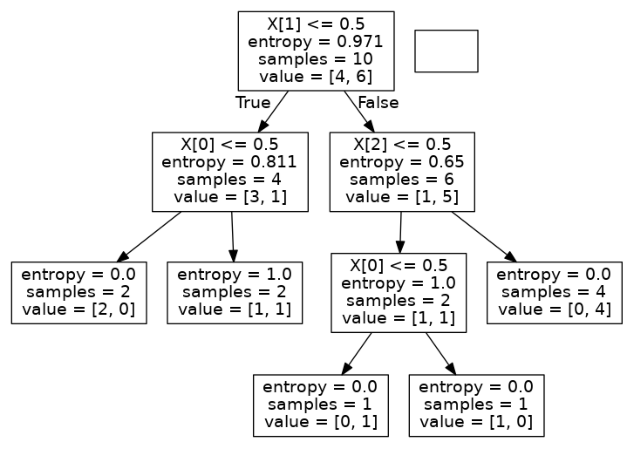

In [29]:
img = pltimg.imread('imgs/catdog.png')

plt.figure(figsize=(12,8))
plt.imshow(img)
plt.axis('off')
plt.show()